In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [7]:
df.duplicated().any()

True

In [8]:
duplicate_count=df.duplicated().sum()
print("Total Duplicate Record:",duplicate_count)

Total Duplicate Record: 3


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


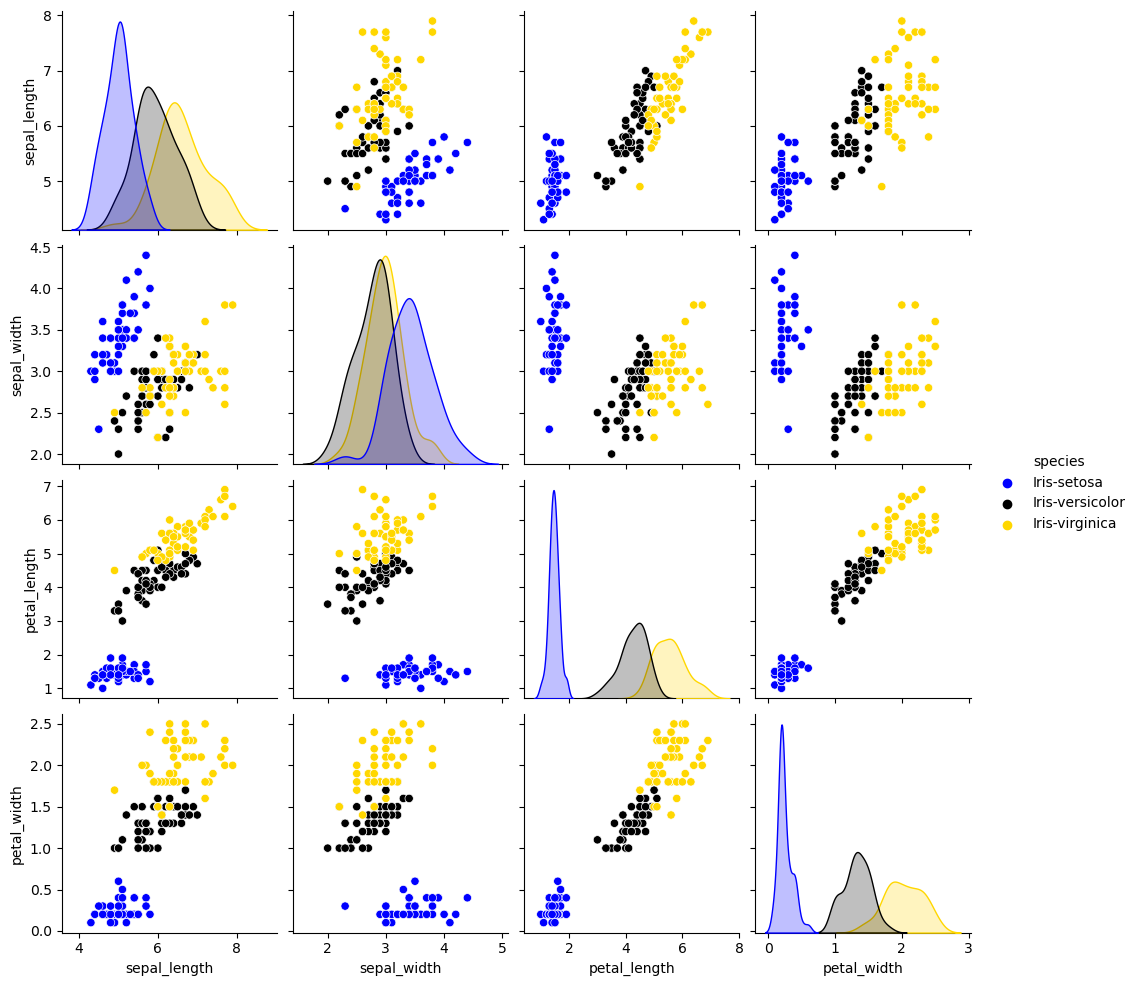

In [12]:
sns.pairplot(df,hue="species",palette={"Iris-setosa":"blue","Iris-versicolor":"black","Iris-virginica":"gold"})
plt.show()

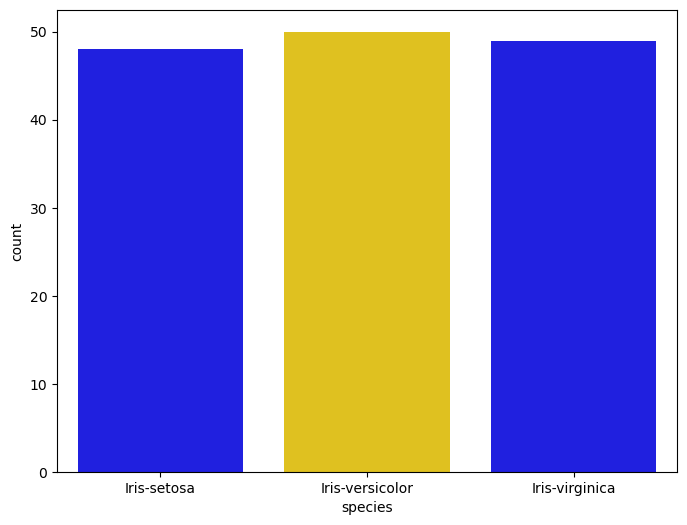

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x="species",data=df,palette={"Iris-setosa":"blue","Iris-versicolor":"gold","Iris-virginica":"blue"})
plt.show()

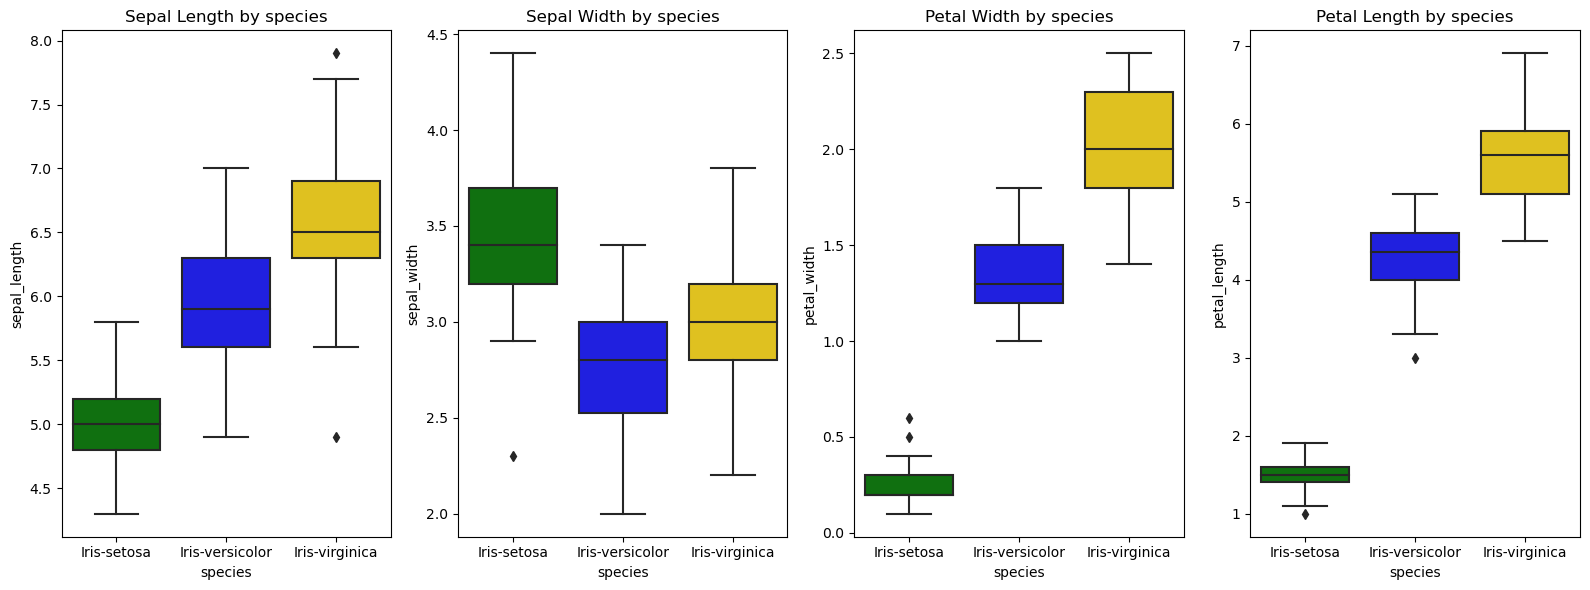

In [14]:
plt.figure(figsize=(16,6))
plt.subplot(141)
sns.boxplot(x="species",y="sepal_length",data=df,palette={"Iris-setosa":"green","Iris-versicolor":"blue","Iris-virginica":"gold"})
plt.title("Sepal Length by species")

plt.subplot(142)
sns.boxplot(x="species",y="sepal_width",data=df,palette={"Iris-setosa":"green","Iris-versicolor":"blue","Iris-virginica":"gold"})
plt.title("Sepal Width by species")


plt.subplot(143)
sns.boxplot(x="species",y="petal_width",data=df,palette={"Iris-setosa":"green","Iris-versicolor":"blue","Iris-virginica":"gold"})
plt.title("Petal Width by species")


plt.subplot(144)
sns.boxplot(x="species",y="petal_length",data=df,palette={"Iris-setosa":"green","Iris-versicolor":"blue","Iris-virginica":"gold"})
plt.title("Petal Length by species")

plt.tight_layout()
plt.show()


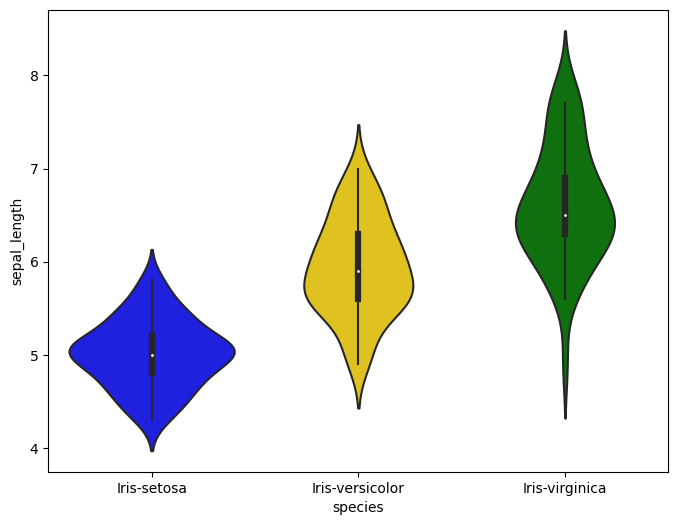

In [15]:
plt.figure(figsize=(8,6))
sns.violinplot(x="species",y="sepal_length",data=df,palette={"Iris-setosa":"blue","Iris-versicolor":"gold","Iris-virginica":"green"})
plt.show()

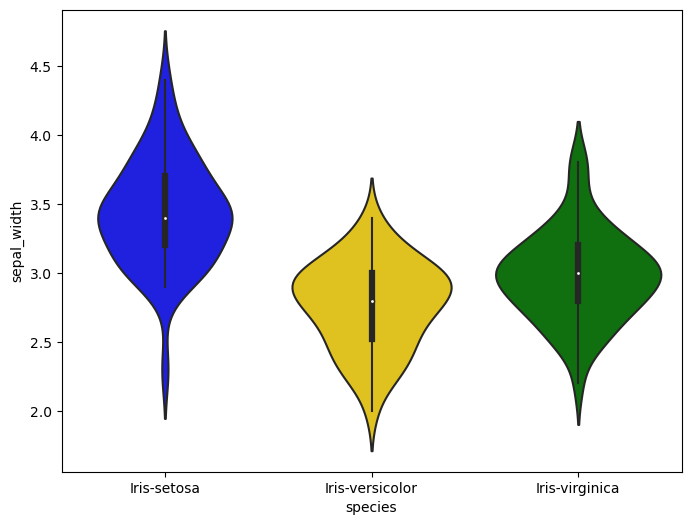

In [16]:
plt.figure(figsize=(8,6))
sns.violinplot(x="species",y="sepal_width",data=df,palette={"Iris-setosa":"blue","Iris-versicolor":"gold","Iris-virginica":"green"})
plt.show()

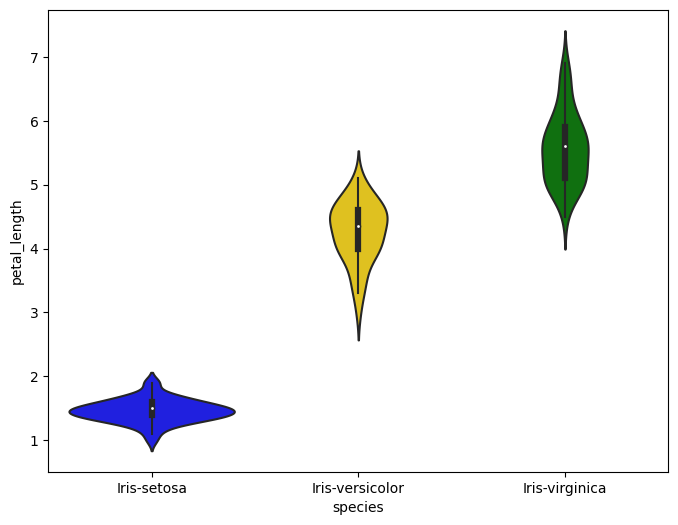

In [17]:
plt.figure(figsize=(8,6))
sns.violinplot(x="species",y="petal_length",data=df,palette={"Iris-setosa":"blue","Iris-versicolor":"gold","Iris-virginica":"green"})
plt.show()

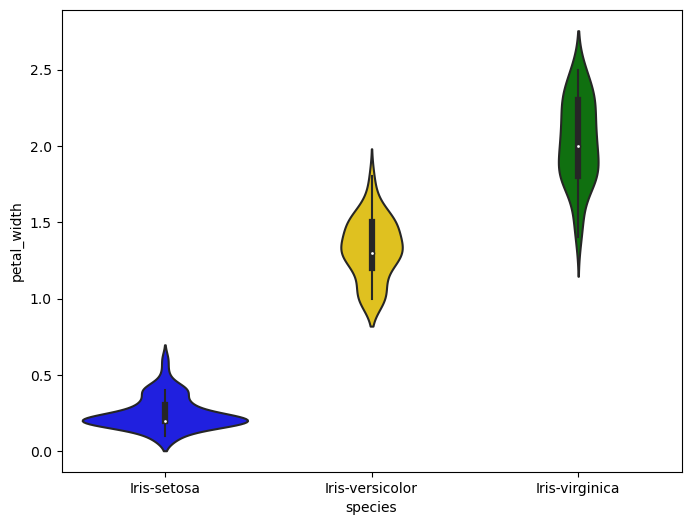

In [18]:
plt.figure(figsize=(8,6))
sns.violinplot(x="species",y="petal_width",data=df,palette={"Iris-setosa":"blue","Iris-versicolor":"gold","Iris-virginica":"green"})
plt.show()

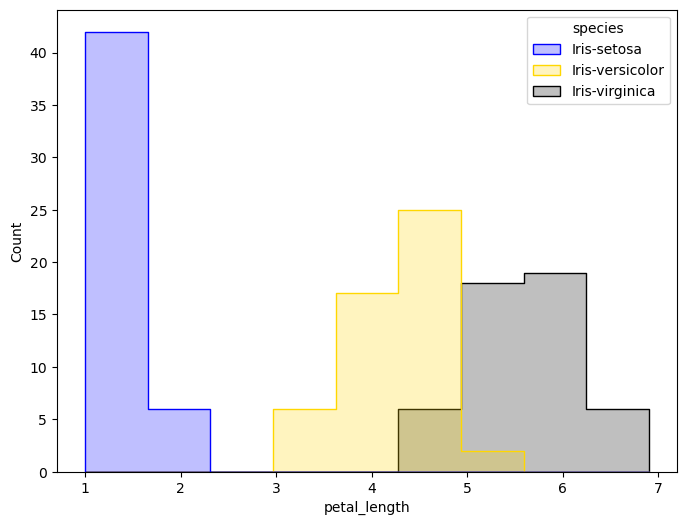

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="petal_length",hue="species",element="step",common_norm=False,palette={"Iris-setosa":"blue","Iris-versicolor":"gold","Iris-virginica":"black"})
plt.show()

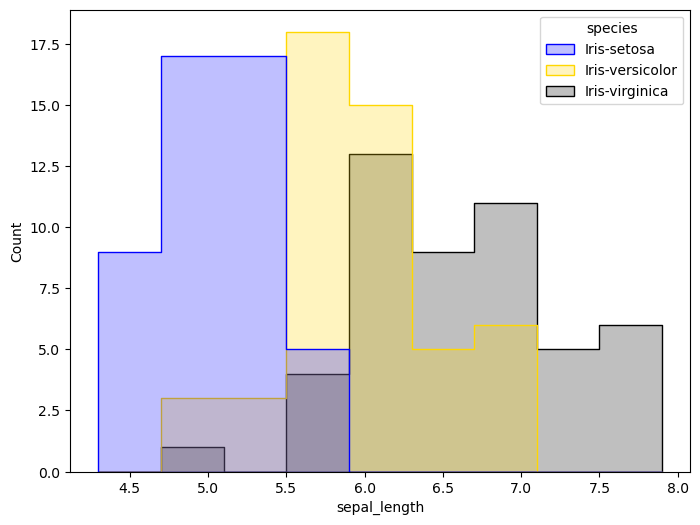

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="sepal_length",hue="species",element="step",common_norm=False,palette={"Iris-setosa":"blue","Iris-versicolor":"gold","Iris-virginica":"black"})
plt.show()

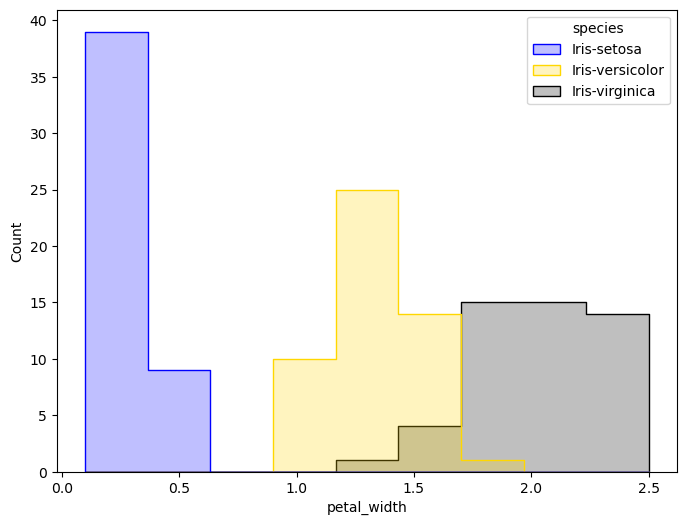

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="petal_width",hue="species",element="step",common_norm=False,palette={"Iris-setosa":"blue","Iris-versicolor":"gold","Iris-virginica":"black"})
plt.show()

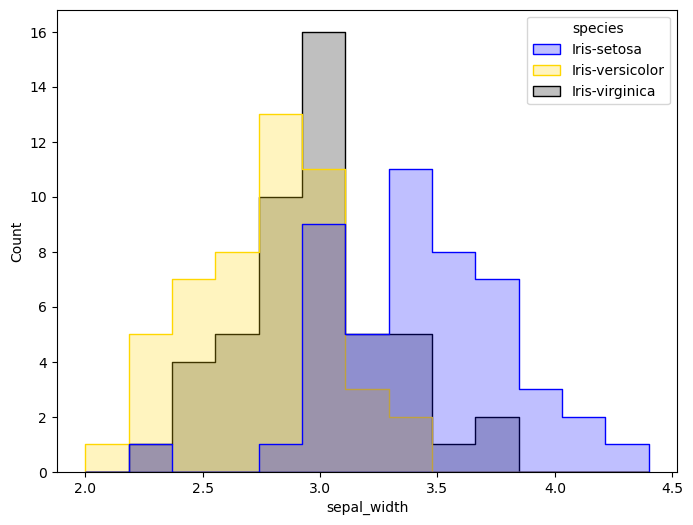

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="sepal_width",hue="species",element="step",common_norm=False,palette={"Iris-setosa":"blue","Iris-versicolor":"gold","Iris-virginica":"black"})
plt.show()

In [23]:
x=df.iloc[:,:4]
y=df.iloc[:,4]

In [24]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [27]:
x_train.shape

(110, 4)

In [28]:
x_test.shape

(37, 4)

In [29]:
y_train.shape

(110,)

In [30]:
y_test.shape

(37,)

In [31]:
model_lg=LogisticRegression()
model_lg.fit(x_train,y_train)

LogisticRegression()

In [32]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [33]:
model_svm=SVC(kernel='linear')
model_svm.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
model_dt=DecisionTreeClassifier(random_state=0)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
model_nn=MLPClassifier(hidden_layer_sizes=(64,32),max_iter=1000,random_state=0)
model_nn.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=0)

In [37]:
y_pred=model_lg.predict(x_test)

In [38]:
y_pred_svm=rf_model.predict(x_test)

In [39]:
y_pred_knn=model_svm.predict(x_test)

In [40]:
y_pred_rf=model_dt.predict(x_test)

In [41]:
y_pred_nn=model_nn.predict(x_test)

In [42]:
results_df=pd.DataFrame({'Actual':y_test,'Predicted_LR':y_pred,'Prediction_RF':y_pred_rf,'Predicted_SVM':y_pred_svm,'Predicted_KNN':y_pred_knn, 'Predicted_DT':y_pred_dt,'Predicted_NN':y_pred_nn})
print(results_df)

NameError: name 'y_pred_dt' is not defined

In [ ]:
def evaluate_model(model_name,y_true,y_pred):
    print(f"Model: {model_name}")
    confusion=confusion_matrix(y_true,y_pred)
    print("Confusion Matrix:")
    print(confusion)
    report=classification_report(y_true,y_pred,target_names=iris['species'].unique())
    print("Classification Report:")
    print(report)
    accuracy=accuracy_score(y_true,y_pred)*100
    print(f"Accuracy:{accuracy:.2f}%")
    print("-"*40)
    evaluate_model("**Logistic Regression**",y_test,y_pred)
    evaluate_model("**Random Forest**",y_test,y_pred_rf)
    evaluate_model("**Support Vector Machine**",y_test,y_pred_svm)
    evaluate_model("**K-Nearest Neighbors**",y_test,y_pred_knn)
    evaluate_model("**Decision Tree**",y_test,y_pred_dt)
    evaluate_model("**Neural Network**",y_test,y_pred_nn)